# CLEANING A DATASET EXAMPLE

In this Jupyter notebook I will demonstrate my cleaning process / thoughts with a large, 
messy dataset I found on http://insideairbnb.com/get-the-data.html. I chose a random csv file
for San Diego, CA because it's a beautiful city.

### Importing packages and taking a look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('airbnb_sd.csv')
df.sample(5)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
12011,35229696,https://www.airbnb.com/rooms/35229696,Luxurious Beach Vacation Home,This home was built with details in mind . The...,We are 2 blocks from the beach and next door t...,This home was built with details in mind . The...,We are 2 blocks from the beach and next door t...,NaN,"There is plenty within walking distance, an ea...",NaN,"Your onsite host, Scott will be available duri...",NaN,NaN,67253416,https://www.airbnb.com/users/show/67253416,Tracy,4/14/16,"San Diego, California, United States",I'm an integrative wellness provider. I love ...,within an hour,100%,NaN,f,Point Loma Heights,6.0,6.0,t,f,"San Diego, CA, United States",Ocean Beach,Ocean Beach,San Diego,CA,92107,San Diego,"San Diego, CA",US,United States,32.74560,-117.24743,t,House,Entire home/apt,9,2.0,3.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",NaN,$265.00,$795.00,$300.00,$175.00,1,$0.00,3,1125,4,8,6/14/19,7/28/19,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f
4594,36602920,https://www.airbnb.com/rooms/36602920,Chula Vista's Best,NEW CONSTRUCTION! Bahia Vista II offers the be...,NaN,NEW CONSTRUCTION! Bahia Vista II offers the be...,NaN,NaN,Very close to the train station (less than 5 m...,NaN,NaN,NaN,NaN,73252582,https://www.airbnb.com/users/show/73252582,Shanice-Raynell,5/21/16,"Chicago, Illinois, United States",NaN,within an hour,100%,NaN,f,NaN,1.0,1.0,t,f,"Chula Vista, CA, United States",NaN,Southwest,Chula Vista,CA,91911,San Diego,"Chula Vista, CA",US,United States,32.60217,-117.08868,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,Washe...",NaN,$34.00,$34.00,$0.00,$40.00,1,$25.00,1,60,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f
3788,29902028,https://www.airbnb.com/rooms/29902028,Chic Shoreline Shanty Steps from Sand in Your ...,This welcoming shoreline shanty ideally locate...,You will have a comfortably studio with break...,This welcoming shoreline shanty ideally locate...,The Bungalow is located in the heart of Missio...,NaN,"Getting around San Diego, CA (MYF-Montgomery F...",You will have use if the entire house. Have e...,I look forward to hosting your stay and want t...,NaN,NaN,3962284,https://www.airbnb.com/users/show/3962284,Adam,10/24/12,"San Diego, California, United States","Like to travel, eat, enjoy a fine scotch and a...",within an hour,96%,NaN,f,Mission Beach,3.0,3.0,t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,32.78280,-117.25287,t,Guesthouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",NaN,$75.00,$75.00,$500.00,$65.00,1,$0.00,1,1125,23,46,11/26/18,8/11/19,91.0,9.0,9.0,10.0,9.0,10.0,9.0,f,t,f,strict_14_with_grace_period,f,f
6177,19102827,https://www.airbnb.com/rooms/19102827,San Diego King Studio at Inn at the Park Resort,This large

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13051 non-null  int64  
 1   listing_url                       13051 non-null  object 
 2   name                              13051 non-null  object 
 3   summary                           12635 non-null  object 
 4   space                             10080 non-null  object 
 5   description                       12836 non-null  object 
 6   neighborhood_overview             9138 non-null   object 
 7   notes                             7103 non-null   object 
 8   transit                           8261 non-null   object 
 9   access                            8224 non-null   object 
 10  interaction                       8666 non-null   object 
 11  house_rules                       9587 non-null   object 
 12  thum

In [6]:
# fix boolean columns
replace = {'f': False, 't': True, 'Nan':pd.NA}
df = df.replace(replace)

In [7]:
df = df.convert_dtypes()

In [8]:
df

id                                    Int64
summary                              string
description                          string
host_id                               Int64
host_since                           string
host_response_time                   string
host_response_rate                   string
host_is_superhost                   boolean
host_neighbourhood                   string
host_total_listings_count             Int64
host_has_profile_pic                boolean
host_identity_verified              boolean
neighbourhood                        string
property_type                        string
room_type                            string
accommodates                          Int64
bathrooms                           float64
bedrooms                              Int64
beds                                  Int64
nightly_price                        string
security_deposit                     string
cleaning_fee                         string
guests_included                 

### fix date columns

In [9]:
df['date_host_since'] = pd.to_datetime(df['host_since'], format='%m/%d/%y', errors='coerce')
df['date_first_review'] = pd.to_datetime(df['first_review'], format='%m/%d/%y', errors='coerce')
df['date_last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%y', errors='coerce')

In [10]:
print(df['date_host_since'].isnull().sum())
print(df['date_first_review'].isnull().sum())
print(df['date_last_review'].isnull().sum())

5
2027
2027


In [11]:
print(df['date_host_since'].dtypes)
print(df['date_first_review'].dtypes)
print(df['date_last_review'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
# drop our old "date" columns
to_drop = ['host_since','first_review','last_review']
df = df.drop(to_drop, axis=1)

In [13]:
df['host_response_time'].unique()

<StringArray>
['within a few hours',                 <NA>,       'within a day',
 'a few days or more',     'within an hour']
Length: 5, dtype: string

In [14]:
df['host_neighbourhood'].value_counts()

Pacific Beach     1374
Mission Beach      913
La Jolla           700
East Village       685
North Park         558
                  ... 
Watertown            1
Centro               1
Mission Valley       1
Silom                1
Riverdale            1
Name: host_neighbourhood, Length: 211, dtype: Int64

In [15]:
# clean currency into integers
df['nightly_price'] = df['nightly_price'].str.replace(',','')
df['nightly_price'] = df['nightly_price'].str.replace('$','')
df['nightly_price'] = pd.to_numeric(df['nightly_price'], errors='coerce')
df['security_deposit'] = df['security_deposit'].str.replace(',','')
df['security_deposit'] = df['security_deposit'].str.replace('$','')
df['security_deposit'] = pd.to_numeric(df['security_deposit'], errors='coerce')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',','')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$','')
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'], errors='coerce')

In [16]:
# fix host rate from string to numeric
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                13051 non-null  Int64         
 1   summary                           12635 non-null  string        
 2   description                       12836 non-null  string        
 3   host_id                           13051 non-null  Int64         
 4   host_response_time                10907 non-null  string        
 5   host_response_rate                10907 non-null  float64       
 6   host_is_superhost                 13046 non-null  boolean       
 7   host_neighbourhood                11109 non-null  string        
 8   host_total_listings_count         13046 non-null  Int64         
 9   host_has_profile_pic              13046 non-null  boolean       
 10  host_identity_verified            13046 non-nu

In [18]:
# drop rows w/o a rating
df = df.dropna(subset=['review_scores_rating'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 1 to 13050
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                10906 non-null  Int64         
 1   summary                           10629 non-null  string        
 2   description                       10798 non-null  string        
 3   host_id                           10906 non-null  Int64         
 4   host_response_time                9576 non-null   string        
 5   host_response_rate                9576 non-null   float64       
 6   host_is_superhost                 10905 non-null  boolean       
 7   host_neighbourhood                9373 non-null   string        
 8   host_total_listings_count         10905 non-null  Int64         
 9   host_has_profile_pic              10905 non-null  boolean       
 10  host_identity_verified            10905 non-nu

In [20]:
# took care of most listing w/o summary or description
# was thinking of making them boolean columns, now will remove
to_drop = ['summary','description']
df = df.drop(to_drop, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 1 to 13050
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                10906 non-null  Int64         
 1   host_id                           10906 non-null  Int64         
 2   host_response_time                9576 non-null   string        
 3   host_response_rate                9576 non-null   float64       
 4   host_is_superhost                 10905 non-null  boolean       
 5   host_neighbourhood                9373 non-null   string        
 6   host_total_listings_count         10905 non-null  Int64         
 7   host_has_profile_pic              10905 non-null  boolean       
 8   host_identity_verified            10905 non-null  boolean       
 9   neighbourhood                     10562 non-null  string        
 10  property_type                     10906 non-nu

In [42]:
# check categorical columns
print(df['cancellation_policy'].value_counts())
print(df['room_type'].value_counts())
print(df['property_type'].value_counts())
print(df['host_response_time'].value_counts())

strict_14_with_grace_period    5081
moderate                       3154
flexible                       2045
super_strict_60                 441
super_strict_30                 125
strict                           60
Name: cancellation_policy, dtype: int64
Entire home/apt    8020
Private room       2763
Shared room         123
Name: room_type, dtype: int64
House                     3848
Apartment                 2853
Condominium               1518
Townhouse                  608
Guesthouse                 455
Guest suite                440
Bungalow                   277
Cottage                    273
Loft                       229
Villa                       70
Hostel                      64
Serviced apartment          49
Camper/RV                   39
Other                       33
Boat                        27
Tiny house                  27
Bed and breakfast           20
Boutique hotel              17
Resort                      10
Hotel                       10
Aparthotel            

(array([3923., 3634., 1493.,  717.,  393.,  251.,  142.,   83.,   56.,
          86.,   42.,   20.,   13.,    7.,   12.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500.]),
 <BarContainer object of 15 artists>)

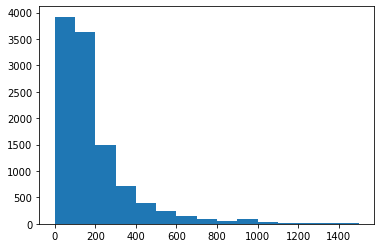

In [36]:
plt.hist(x=df['nightly_price'], range=(0,1500), bins=15)

In [39]:
# take a look
pd.set_option('display.precision',2)
df.describe()

,id,host_id,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,nightly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.09e+04,1.09e+04,9576.00,10905.00,10906.00,10905.00,10903.00,10903.00,10906.00,9073.0,10082.00,10906.00,10906.00,10906.0,10906.00,10906.00,10906.00,10902.00,10904.00,10893.00,10902.00,10892.00,10890.0
mean,2.06e+07,7.19e+07,97.46,37.41,4.48,1.48,1.63,2.39,201.43,317.9,103.91,2.39,3.87,612.4,41.72,83.43,95.30,9.71,9.59,9.83,9.82,9.79,9.5
std,1.02e+07,7.19e+07,9.33,150.40,2.98,0.86,1.17,1.88,249.60,472.2,100.22,2.32,12.47,1399.5,63.45,126.89,6.99,0.71,0.79,0.57,0.59,0.56,0.8
min,6.00e+00,2.90e+01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.0,1.00,2.00,20.00,2.00,2.00,2.00,2.00,2.00,2.0
25%,1.33e+07,1.26e+07,100.00,1.00,2.00,1.00,1.00,1.00,80.00,0.0,37.00,1.00,1.00,29.0,5.00,10.00,94.00,10.00,9.00,10.00,10.00,10.00,9.0
50%,2.12e+07,4.39e+07,100.00,2.00,4.00,1.00,1.00,2.00,134.00,200.0,75.00,1.00,2.00,365.0,16.00,32.00,97.00,10.00,10.00,10.00,10.00,10.00,10.0
75%,2.90e+07,1.14e+08,100.00,9.00,6.00,2.00,2.00,3.00,235.00,500.0,145.00,3.00,3.00,1125.0,52.00,104.00,100.00,10.00,10.00,10.00,10.00,10.00,10.0
max,3.77e+07,2.84e+08,100.00,1737.00,24.00,27.50,10.00,22.00,10000.00,5000.0,1025.00,24.00,800.00,99999.0,786.00,1572.00,100.00,10.00,10.00,10.00,10.00,10.00,10.0


holy crap, someone has 1737 listings.
I don't think anyone is going to stay for a minimum of 800 days, good luck on that one.

In [41]:
# set categorical data type to save memory
df['cancellation_policy'] = pd.Categorical(df['cancellation_policy'])
df['room_type'] = pd.Categorical(df['room_type'])
df['property_type'] = pd.Categorical(df['property_type'])
df['host_response_time'] = pd.Categorical(df['host_response_time'])
df['host_neighborhood'] = pd.Categorical(df['host_neighborhood'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 1 to 13050
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                10906 non-null  Int64         
 1   host_id                           10906 non-null  Int64         
 2   host_response_time                9576 non-null   category      
 3   host_response_rate                9576 non-null   float64       
 4   host_is_superhost                 10905 non-null  boolean       
 5   host_neighbourhood                9373 non-null   string        
 6   host_total_listings_count         10905 non-null  Int64         
 7   host_has_profile_pic              10905 non-null  boolean       
 8   host_identity_verified            10905 non-null  boolean       
 9   neighbourhood                     10562 non-null  string        
 10  property_type                     10906 non-nu

In [44]:
# visualizations
### compare ratings based on diff categories
### look at stats if you have a 3 bed / 2 bath

In [61]:
df1 = df.loc[(df['bathrooms']>=1.5) & (df['bathrooms'] < 3)]

In [62]:
df1.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,nightly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,date_host_since,date_first_review,date_last_review
1,17138468,79755951,NaN,NaN,False,La Jolla,1,True,False,La Jolla,Apartment,Entire home/apt,1,2.0,2,3,1400.0,NaN,NaN,1,30,1125,2,4,100,10,10,10,10,10,10,False,True,False,strict_14_with_grace_period,False,False,2016-06-24,2017-04-22,2017-08-31
19,6900465,13643691,a few days or more,0.0,False,Midtown,2,True,True,Midtown,Townhouse,Private room,1,2.5,1,1,99.0,500.0,50.0,1,30,1125,7,14,97,10,10,10,10,10,10,False,False,False,strict_14_with_grace_period,False,False,2014-03-28,2015-08-03,2017-06-09
53,17634558,119877234,within a few hours,100.0,False,Mission Hill,2,True,True,Mission Hill,House,Private room,1,1.5,1,1,50.0,150.0,50.0,1,31,365,40,80,97,10,9,10,10,10,10,False,False,False,strict_14_with_grace_period,False,False,2017-03-09,2017-03-18,2018-09-10
54,17635204,119877234,within a few hours,100.0,False,Mission Hill,2,True,True,Mission Hill,House,Private room,1,1.5,1,1,50.0,150.0,50.0,1,31,365,21,42,97,10,9,10,10,10,10,False,False,False,strict_14_with_grace_period,False,False,2017-03-09,2017-03-18,2017-10-29
56,20485276,73851541,within a few hours,100.0,True,<NA>,5,True,True,Rancho Bernardo,House,Private room,1,1.5,1,2,150.0,NaN,NaN,1,10,360,2,4,100,10,10,10,10,10,10,False,True,False,moderate,False,False,2016-05-24,2018-07-01,2019-02-03


(array([139., 298., 350., 505., 375., 413., 242., 184., 106., 125.,  79.,
         51.,  27.,  31.,  10.,  14.,   4.,   7.,   3.,  26.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

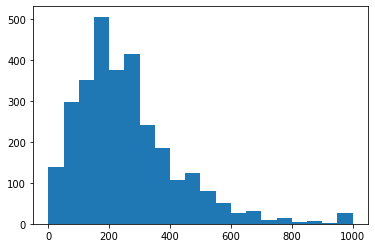

In [68]:
plt.hist(df1['nightly_price'], bins=20, range=(0,1000))

In [66]:
df1['nightly_price'].max()

5010.0

In [70]:
df1.groupby('room_type').review_scores_rating.mean()

room_type
Entire home/apt    94.84
Private room       95.80
Shared room        95.08
Name: review_scores_rating, dtype: float64

In [71]:
df1.groupby('host_is_superhost').review_scores_rating.mean()

host_is_superhost
False    93.55
True     97.19
Name: review_scores_rating, dtype: float64

In [72]:
# export to csv
df.to_csv('AirBnB_clean_data.csv')